# Deep Neural Network with 5 Input Features

In this notebook we will train a deep neural network using 5 input feature to perform binary classification of our dataset.

## Setup

We first need to import the libraries and frameworks to help us create and train our model. 

- Numpy will allow us to manipulate our input data
- Matplotlib gives us easy graphs to visualize performance
- Sklearn helps us with data normalization and shuffling
- Keras is our deep learning frameworks which makes it easy to create and train our model

In [1]:
#!bin/env/python3
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle

from tensorflow.keras import models
from tensorflow.keras import layers

## Load Data

Here we load the numpy array that we create previously. Let's check the dimension to make sure they are correctly formatted.

In [3]:
X = np.load("../db/x3.npy")
Y = np.load("../db/y3.npy")

print("X: " + str(X.shape))
print("Y: " + str(Y.shape))

X: (3559, 30)
Y: (3559,)


## Data Preparation

The neural network will perform better during training if data is normalized. We also want to shuffle the inputs to avoid training out model on a skewed dataset.

In [30]:
transformer = Normalizer().fit(X)
X = transformer.transform(X) # normalizes data according to columns
X, Y = shuffle(X, Y, random_state=0) # shuffle the samples

## Training - Test Split

Ideally we would split our dataset into a training, validation and test set. For this example we will only use a training and validation set. The training set will have 3000 samples and the validation set will contain the remaining samples.

In [8]:
X_train = X[:3000]
Y_train = Y[:3000]


X_test = X[3000:]
Y_test = Y[3000:]

# 3000 training samples
print("Input training tensor: " + str(X_train.shape))
print("Label training tensor: " + str(Y_train.shape) + "\n")

# 559 test/validation samples
print("Input validation tensor: " + str(X_test.shape))
print("Label validation tensor: " + str(Y_test.shape))

Input training tensor: (3000, 30)
Label training tensor: (3000,)

Input validation tensor: (559, 30)
Label validation tensor: (559,)


## Defining our model

Here we finally create our model which in this case will be fully connected deep neural network with three hidden layer and a dropout layer. 

We also choose an optimizer (RMSprop), a loss function (binary crossentropy) and our metric for evaluation (accuracy).

We can also take a look at the size of our model

In [36]:
nn = models.Sequential()
nn.add(layers.Dense(200, activation='relu', input_shape=(30,)))
nn.add(layers.Dense(100, activation='relu'))
nn.add(layers.Dropout(0.5))
nn.add(layers.Dense(1, activation='sigmoid'))

nn.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

# Training

Here we actually train the model we defined above. We can specify the batch size (30) and the number of epochs. We also specify the validation set to evaluate how our model performs on data it has never seen after each epochs. This is important so that we can identify when the model begin to overfit to the training data

In [39]:
history = nn.fit(
                X_train,
                Y_train,
                epochs=100,
                batch_size=30,
                validation_data=(X_test,Y_test)
                )

history_dict = history.history
nn.summary()

print("Training accuracy: " + str(history_dict['accuracy'][-1]))
print("Training loss: " + str(history_dict['loss'][-1]) + "\n")

print("Validation accuracy: " + str(history_dict['val_accuracy'][-1]))
print("Validation loss: " + str(history_dict['val_loss'][-1]))

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7343 - val_loss: 0.5210 - val_accuracy: 0.7388
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7317 - val_loss: 0.5168 - val_accuracy: 0.7335
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7383 - val_loss: 0.5056 - val_accuracy: 0.7388
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7370 - val_loss: 0.5317 - val_accuracy: 0.7209
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7373 - val_loss: 0.5211 - val_accuracy: 0.7388
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7393 - val_loss: 0.5217 - val_accuracy: 0.7191
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7387 - val_loss: 0.5022 - val_accuracy: 0.7370

Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7597 - val_loss: 0.4968 - val_accuracy: 0.7567
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7577 - val_loss: 0.4928 - val_accuracy: 0.7549
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7620 - val_loss: 0.4965 - val_accuracy: 0.7478
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7563 - val_loss: 0.4853 - val_accuracy: 0.7424
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7577 - val_loss: 0.4830 - val_accuracy: 0.7621
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7567 - val_loss: 0.4908 - val_accuracy: 0.7496
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7597 - val_loss: 0.5159 - val_accuracy:

## Evaluating the Model

After our training we get ~72% accuracy on our validation data. When looking at our loss, we can see that our model is indeed learning and it does not seem to be overfitting too much as the training and validation accuracies remain fairly consistent troughout training.

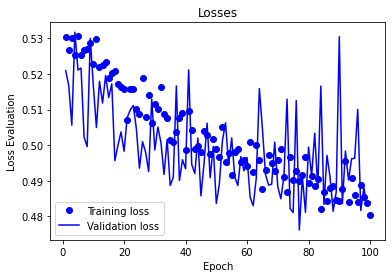

<Figure size 432x288 with 0 Axes>

In [40]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss Evaluation')
plt.legend()
plt.show()

plt.clf()

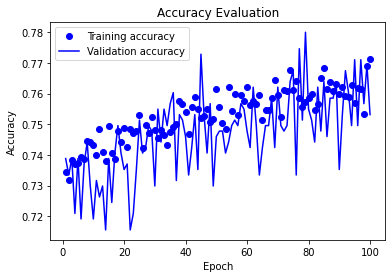

<Figure size 432x288 with 0 Axes>

In [41]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Accuracy Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.clf()

## The last step

If we were happy with our model tuning the last step would be to save our model and evaluate on the test set.